In [55]:
library(DESeq2)
library(RColorBrewer)

In [56]:
library(reshape2)


In [57]:
library("gplots")


In [58]:
library(readxl)
library(tidyverse)

In [59]:
library("pheatmap")
library("RColorBrewer")

In [60]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [61]:
HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'
PRO_COLOR = 'MediumSeaGreen'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

tpal = brewer.pal(5, "Purples")
gpal = brewer.pal(4, 'Dark2')
ann_colors = list(
    Timepoint = c('1'=tpal[1], '2'=tpal[2], '3'=tpal[3], 
                  '4'=tpal[4], '5'=tpal[5]),
    Group = c(P =PCOLOR_light, C = PRO_COLOR)
)


In [62]:
list.files()

[1] "CC1A3 RNASEQ 1A3 DESeq ref vs longterm.ipynb" 
[2] "CC1A3 RNASEQ 1A3 DESeq.ipynb"                 
[3] "CC1A3 RNASEQ MED4 correlation.ipynb"          
[4] "CC1A3 RNASEQ MED4 DESeq ref vs longterm.ipynb"
[5] "CC1A3 RNASEQ MED4 DESeq.ipynb"                
[6] "CC1A3 RNASEQ MED4 DESeq_longterm2.ipynb"      
[7] "CC1A3 WGCNA CC.ipynb"                         
[8] "data"                                         
[9] "DE_results"

In [63]:
fname_counts = file.path('data', 'MED4_counts_combined.txt')

In [64]:
cdf = read.csv(fname_counts, sep='\t' )

In [65]:
rownames(cdf) = cdf$gene_id

In [66]:
md = read_excel(file.path('data','CC1A3_RNASEQ_metadata.xlsx'))

In [67]:
names(md)

[1] "sample_id"               "TGCnew#"                
 [3] "sample"                  "Conc.Qubit TGC [ng/ul]" 
 [5] "starting input RNA (ng)" "Lib_conc [ng/ul]"       
 [7] "Group"                   "Timepoint"              
 [9] "Replicate"               "Day"                    
[11] "extraction"              "techincal_replicate"

In [68]:
md = md %>% rename('init_RNA' = 'starting input RNA (ng)')

In [69]:
md = md %>% mutate(phase = factor(recode(Timepoint, 
                                  '1' = 'logExp', 
                                  '2' = 'decline' , 
                                  '3' = 'longterm' ,
                                  '4' = 'longterm' ,
                                  '5' = 'longterm' ,
                                         .default = 'NA'
                                 ), levels=c('logExp', 'decline', 'longterm', 'NA')))

In [70]:
group <- paste0(md$Group, md$Timepoint)
group
md$groupandtime = group

[1] "A1"       "A1"       "A1"       "A2"       "A2"       "A2"      
 [7] "A3"       "A3"       "A3"       "C1"       "C1"       "C1"      
[13] "C2"       "C2"       "C2"       "C2"       "C2"       "C3"      
[19] "C3"       "C3"       "C3"       "C3"       "C4"       "C4"      
[25] "C4"       "C5"       "C5"       "C5"       "MockMock" "P1"      
[31] "P1"       "P1"       "P2"       "P2"       "P2"

In [71]:
md = md %>% mutate(treatment = factor(recode(groupandtime, 
                                  'P1' = 'P1', 
                                  'P2' = 'P2', 
                                  'C1' = 'C1' , 
                                  'C2' = 'C2' , 
                                  'C3' = 'longterm' ,
                                  'C4' = 'longterm' ,
                                  'C5' = 'longterm' ,
                                         .default = 'NA'
                                 ), levels=c('P1', 'P2', 'C1', 'C2', 'longterm', 'NA')))

In [72]:
table(md$treatment)


      P1       P2       C1       C2 longterm       NA 
       3        3        3        5       11       10 

In [73]:
head(md)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,NA
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,NA
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,NA
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,NA
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,NA
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,NA


In [74]:
md$Group = factor(md$Group, levels = c('P', 'C', 'A', 'Mock'))


In [75]:
head(cdf)

,gene_id,gene,product,protein_id,old_locus_tag,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA,0,0,0,1,0,⋯,1303,591,765,0,3076,3135,2995,2956,4869,4302
TX50_RS00025,TX50_RS00025,,hypothetical protein,WP_011131640.1,NA,2,2,0,0,0,⋯,85,23,66,2,427,310,491,111,198,191
TX50_RS00030,TX50_RS00030,purL,phosphoribosylformylglycinamidine synthase subunit PurL,WP_011131641.1,NA,0,4,3,3,3,⋯,513,328,518,0,1162,1365,1266,1878,3482,3459
TX50_RS00035,TX50_RS00035,purF,amidophosphoribosyltransferase,WP_011131642.1,NA,0,1,1,0,0,⋯,238,115,209,0,914,1196,1035,516,1070,1166
TX50_RS00040,TX50_RS00040,,DNA topoisomerase 4 subunit A,WP_011131643.1,NA,0,8,0,2,5,⋯,491,218,354,0,1761,2014,1799,1399,1297,1216
TX50_RS00045,TX50_RS00045,,tetratricopeptide repeat protein,WP_011131644.1,NA,0,0,0,0,0,⋯,80,33,55,0,273,200,305,250,517,345


In [76]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [77]:
head(md)
head(counts)
head(genes)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,NA
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,NA
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,NA
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,NA
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,NA
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,NA


,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,A2C_S12,A3A_S13,A3B_S14,A3C_S15,C1A_S16,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,0,0,0,1,0,4,0,0,0,1119,⋯,1303,591,765,0,3076,3135,2995,2956,4869,4302
TX50_RS00025,2,2,0,0,0,0,0,0,0,127,⋯,85,23,66,2,427,310,491,111,198,191
TX50_RS00030,0,4,3,3,3,4,2,0,5,359,⋯,513,328,518,0,1162,1365,1266,1878,3482,3459
TX50_RS00035,0,1,1,0,0,4,0,0,0,326,⋯,238,115,209,0,914,1196,1035,516,1070,1166
TX50_RS00040,0,8,0,2,5,0,4,7,0,600,⋯,491,218,354,0,1761,2014,1799,1399,1297,1216
TX50_RS00045,0,0,0,0,0,3,1,0,0,113,⋯,80,33,55,0,273,200,305,250,517,345


,gene_id,gene,product,protein_id,old_locus_tag
,<chr>,<chr>,<chr>,<chr>,<lgl>
TX50_RS00020,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA
TX50_RS00025,TX50_RS00025,,hypothetical protein,WP_011131640.1,NA
TX50_RS00030,TX50_RS00030,purL,phosphoribosylformylglycinamidine synthase subunit PurL,WP_011131641.1,NA
TX50_RS00035,TX50_RS00035,purF,amidophosphoribosyltransferase,WP_011131642.1,NA
TX50_RS00040,TX50_RS00040,,DNA topoisomerase 4 subunit A,WP_011131643.1,NA
TX50_RS00045,TX50_RS00045,,tetratricopeptide repeat protein,WP_011131644.1,NA


In [78]:
table(md$sample_id == names(counts))


TRUE 
  35 

# Remove the 60ng technical replicate and non P ,C samples

In [79]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [80]:
# remove last 5 lines that are not genes
counts = head(counts, -5)
genes = head(genes, -5)

In [81]:
md_noalt = filter(md, Group %in% c('P', 'C'), techincal_replicate %in% 0)


In [82]:
counts_no_alt = select(counts, md_noalt$sample_id)

In [83]:
table(md_noalt$sample_id == names(counts_no_alt))


TRUE 
  21 

In [84]:
cts = counts_no_alt
coldata= md_noalt


In [85]:
head(coldata)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
C1A_S16,16,C1A,300.0,100,1.15,C,1,A,11,1,0,logExp,C1,C1
C1B_S17,17,C1B,84.9,100,1.91,C,1,B,11,1,0,logExp,C1,C1
C1C_S18,18,C1C,56.5,100,2.24,C,1,C,11,2,0,logExp,C1,C1
C2A_60ng_S19,19,C2A,6.3,60,1.87,C,2,A,18,4,0,decline,C2,C2
C2B_100ng_S20,20,C2B_1,31.1,100,2.28,C,2,B,18,2,0,decline,C2,C2
C2C_100ng_S22,22,C2C_1,15.7,100,2.80,C,2,C,18,2,0,decline,C2,C2


In [86]:
head(cts)

,C1A_S16,C1B_S17,C1C_S18,C2A_60ng_S19,C2B_100ng_S20,C2C_100ng_S22,C3A_100ng_S24,C3B_60ng_S26,C3C_100ng_S27,C4A_S29,⋯,C4C_S31,C5A_S32,C5B_S33,C5C_S34,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TX50_RS00020,1119,2394,5314,613,2227,3769,355,2220,1046,1384,⋯,1526,1303,591,765,3076,3135,2995,2956,4869,4302
TX50_RS00025,127,331,450,93,141,268,26,106,29,86,⋯,93,85,23,66,427,310,491,111,198,191
TX50_RS00030,359,907,1796,238,542,1061,239,961,471,671,⋯,1169,513,328,518,1162,1365,1266,1878,3482,3459
TX50_RS00035,326,767,540,181,385,692,102,492,150,328,⋯,404,238,115,209,914,1196,1035,516,1070,1166
TX50_RS00040,600,1572,2758,408,1242,1833,182,745,313,621,⋯,689,491,218,354,1761,2014,1799,1399,1297,1216
TX50_RS00045,113,212,538,111,150,249,17,221,69,134,⋯,79,80,33,55,273,200,305,250,517,345


In [87]:
coldata$groupandtime = factor(coldata$groupandtime, levels=c("C1", "P2","P1", "C2", "C3", "C4", "C5"))
coldata$treatment = factor(coldata$treatment, levels=c('P1', 'P2', 'C1', 'C2', 'longterm'))


coldata$Group = factor(coldata$Group, levels=c("P", "C"))
coldata$Timepoint = factor(coldata$Timepoint, levels=c(1,2,3,4,5))
coldata$extraction = factor(coldata$extraction)


In [88]:
colnames(cts) = coldata$sample
rownames(coldata) = coldata$sample


Warning message:
"Setting row names on a tibble is deprecated."


In [89]:
dput(unique(coldata$groupandtime))
dput(unique(coldata$Group))

structure(c(1L, 4L, 5L, 6L, 7L, 3L, 2L), levels = c("C1", "P2", 
"P1", "C2", "C3", "C4", "C5"), class = "factor")
structure(2:1, levels = c("P", "C"), class = "factor")


In [90]:
rownames(coldata) = coldata$sample



Warning message:
"Setting row names on a tibble is deprecated."


In [91]:
rownames(coldata)

[1] "C1A"   "C1B"   "C1C"   "C2A"   "C2B_1" "C2C_1" "C3A_1" "C3B"   "C3C_1"
[10] "C4A"   "C4B"   "C4C"   "C5A"   "C5B"   "C5C"   "P1A"   "P1B"   "P1C"  
[19] "P2A"   "P2B"   "P2C"

In [92]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [93]:
design = model.matrix(~ 0+ extraction + treatment, data = coldata)

In [94]:
design

,extraction1,extraction2,extraction3,extraction4,extraction5,extraction6,extraction7,treatmentP2,treatmentC1,treatmentC2,treatmentlongterm
C1A,1,0,0,0,0,0,0,0,1,0,0
C1B,1,0,0,0,0,0,0,0,1,0,0
C1C,0,1,0,0,0,0,0,0,1,0,0
C2A,0,0,0,1,0,0,0,0,0,1,0
C2B_1,0,1,0,0,0,0,0,0,0,1,0
C2C_1,0,1,0,0,0,0,0,0,0,1,0
C3A_1,0,0,0,1,0,0,0,0,0,0,1
C3B,0,0,0,0,1,0,0,0,0,0,1
C3C_1,0,0,0,1,0,0,0,0,0,0,1
C4A,0,0,0,0,1,0,0,0,0,0,1


In [95]:
design = subset(design, select=-c(extraction7))

In [96]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design= ~treatment)

In [97]:
mcols(dds) <- DataFrame(mcols(dds), genes)
mcols(dds)

DataFrame with 1865 rows and 5 columns
                  gene_id        gene                product     protein_id
              <character> <character>            <character>    <character>
TX50_RS00020 TX50_RS00020        dnaN DNA polymerase III s.. WP_011131639.1
TX50_RS00025 TX50_RS00025               hypothetical protein WP_011131640.1
TX50_RS00030 TX50_RS00030        purL phosphoribosylformyl.. WP_011131641.1
TX50_RS00035 TX50_RS00035        purF amidophosphoribosylt.. WP_011131642.1
TX50_RS00040 TX50_RS00040             DNA topoisomerase 4 .. WP_011131643.1
...                   ...         ...                    ...            ...
TX50_RS09870 TX50_RS09870               hypothetical protein WP_225866747.1
TX50_RS09875 TX50_RS09875               hypothetical protein WP_225866749.1
TX50_RS09880 TX50_RS09880             SxtJ family membrane.. WP_011132879.1
TX50_RS09885 TX50_RS09885             DUF5989 family protein WP_225866752.1
TX50_RS09890 TX50_RS09890               hypotheti

In [98]:
dds

class: DESeqDataSet 
dim: 1865 21 
metadata(1): version
assays(1): counts
rownames(1865): TX50_RS00020 TX50_RS00025 ... TX50_RS09885 TX50_RS09890
rowData names(5): gene_id gene product protein_id old_locus_tag
colnames(21): C1A C1B ... P2B P2C
colData names(15): sample_id TGCnew# ... groupandtime treatment

In [99]:
keep <- rowSums(counts(dds)) >= 10
table(keep)
dds <- dds[keep,]

keep
FALSE  TRUE 
   10  1855 

In [100]:
names(colData(dds))

[1] "sample_id"              "TGCnew#"                "sample"                
 [4] "Conc.Qubit TGC [ng/ul]" "init_RNA"               "Lib_conc [ng/ul]"      
 [7] "Group"                  "Timepoint"              "Replicate"             
[10] "Day"                    "extraction"             "techincal_replicate"   
[13] "phase"                  "groupandtime"           "treatment"

In [101]:
dds$groupandtime = factor(dds$groupandtime, levels=c("C1", "P2","P1", "C2", "C3", "C4", "C5"))
dds$treatment = factor(dds$treatment, levels=c('P1', 'P2', 'C1', 'C2', 'longterm'))

dds$Group = factor(dds$Group, levels=c("P", "C"))
dds$Timepoint = factor(dds$Timepoint, levels=c(1,2,3,4,5))
dds$extraction = factor(dds$extraction)


In [102]:
table(dds$treatment)
table(coldata$treatment)


      P1       P2       C1       C2 longterm 
       3        3        3        3        9 


      P1       P2       C1       C2 longterm 
       3        3        3        3        9 

In [103]:
vsd <- vst(dds, blind = FALSE)
head(assay(vsd), 3)

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
TX50_RS00020,10.196298,10.135472,11.551254,10.230150,10.845017,10.966830,10.274913,10.706088,10.923666,10.786769,⋯,10.671712,10.901660,10.826097,10.564112,10.142860,10.130244,9.976754,11.670544,12.07450,12.088422
TX50_RS00025,7.178309,7.382920,8.057168,7.595960,7.008740,7.272287,6.684207,6.525936,6.051336,6.931801,⋯,6.803579,7.099192,6.376845,7.156434,7.395142,6.938349,7.461479,7.077761,7.55558,7.686886
TX50_RS00030,8.590541,8.763096,9.998871,8.890356,8.838601,9.162565,9.711679,9.513262,9.784730,9.753935,⋯,10.290864,9.572384,9.985185,10.007705,8.766277,8.952870,8.760403,11.019518,11.59259,11.774860


In [104]:
head(colData(vsd))

DataFrame with 6 rows and 16 columns
          sample_id   TGCnew#      sample Conc.Qubit TGC [ng/ul]  init_RNA
        <character> <numeric> <character>              <numeric> <numeric>
C1A         C1A_S16        16         C1A                  300.0       100
C1B         C1B_S17        17         C1B                   84.9       100
C1C         C1C_S18        18         C1C                   56.5       100
C2A    C2A_60ng_S19        19         C2A                    6.3        60
C2B_1 C2B_100ng_S20        20       C2B_1                   31.1       100
C2C_1 C2C_100ng_S22        22       C2C_1                   15.7       100
      Lib_conc [ng/ul]    Group Timepoint   Replicate         Day extraction
             <numeric> <factor>  <factor> <character> <character>   <factor>
C1A               1.15        C         1           A          11          1
C1B               1.91        C         1           B          11          1
C1C               2.24        C         1           C  

In [105]:
rld <- rlog(dds, blind = FALSE)
head(assay(rld), 3)

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
TX50_RS00020,10.303781,10.255453,11.390403,10.331062,10.819304,10.917158,10.367218,10.708109,10.882297,10.772632,⋯,10.680685,10.864681,10.804035,10.595136,10.261181,10.251244,10.130757,11.487504,11.819260,11.830697
TX50_RS00025,7.016443,7.189980,7.756368,7.362883,6.873688,7.096423,6.616145,6.463913,6.087191,6.809689,⋯,6.701322,6.949899,6.369274,6.997299,7.200614,6.813250,7.256723,6.931957,7.333713,7.443274
TX50_RS00030,8.791609,8.925313,9.914731,9.029827,8.986062,9.242524,9.682458,9.523093,9.741291,9.716584,⋯,10.151725,9.570714,9.902469,9.921194,8.927500,9.075387,8.922750,10.749787,11.226369,11.379000


In [106]:
sampleDists <- dist(t(assay(vsd)))
sampleDists

           C1A      C1B      C1C      C2A    C2B_1    C2C_1    C3A_1      C3B
C1B   19.84807                                                               
C1C   52.53913 52.78959                                                      
C2A   38.67113 36.10643 52.91971                                             
C2B_1 31.91392 33.15355 35.08819 32.46711                                    
C2C_1 33.20553 34.48633 31.98189 37.63803 16.38261                           
C3A_1 53.37022 51.48534 52.13171 42.39584 38.44928 39.61087                  
C3B   46.30077 45.95008 45.09673 43.74136 30.04957 27.85410 35.26774         
C3C_1 56.38879 55.54939 49.26232 44.51388 37.41185 38.03816 31.92932 24.37164
C4A   44.42624 43.73322 43.37876 37.05182 28.16022 29.19200 34.43239 21.49572
C4B   44.67558 43.90148 44.65090 37.92050 29.39443 29.66500 33.79809 22.25555
C4C   56.14465 55.13712 50.52849 57.47110 41.66313 38.94530 47.18058 27.62924
C5A   41.47367 39.88968 45.67530 37.66223 29.92830 29.64799 33.1

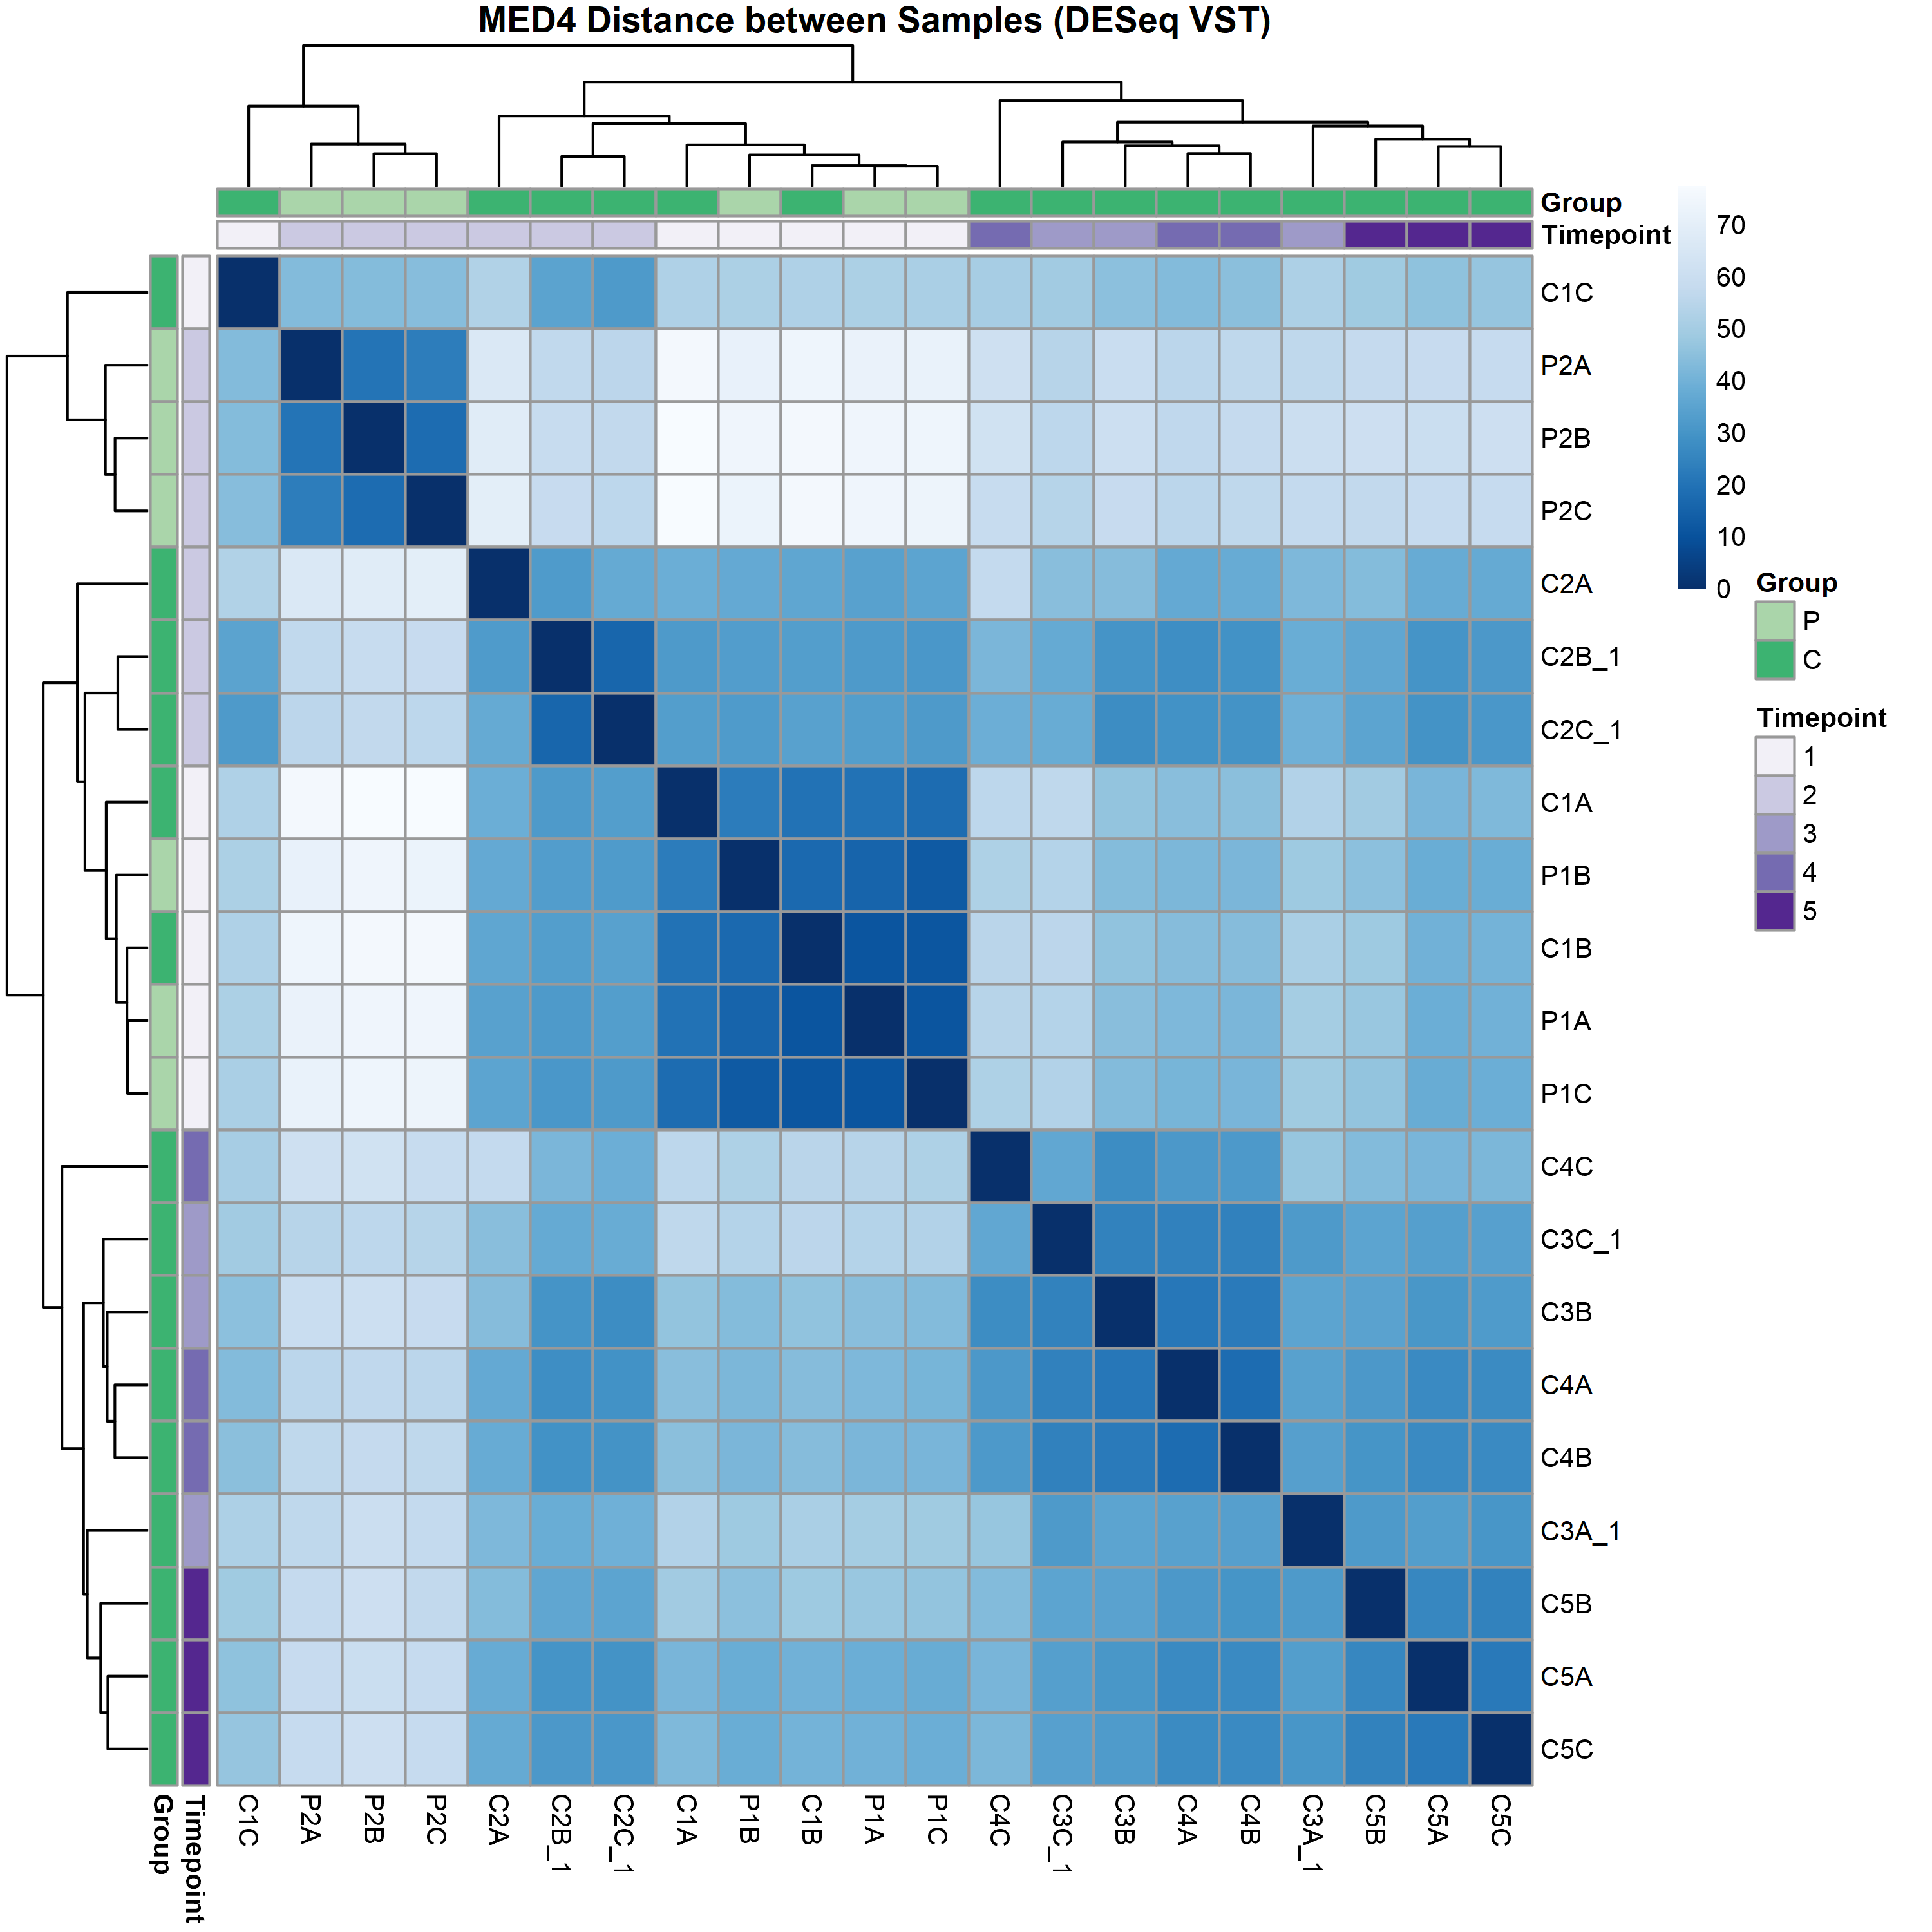

In [107]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists
sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- vsd$sample
colnames(sampleDistMatrix) <- vsd$sample
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
ann_df = colData(vsd)[c('Timepoint', 'Group')]

pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         annotation_row = ann_df,
         annotation_col = ann_df,
         annotation_colors = ann_colors,
         main = "MED4 Distance between Samples (DESeq VST)"
)

In [108]:
head(sampleDistMatrix)

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
C1A,0.00000,19.84807,52.53913,38.67113,31.91392,33.20553,53.37022,46.30077,56.38879,44.42624,⋯,56.14465,41.47367,49.42846,42.72913,19.89363,22.79831,18.19405,75.69517,77.40229,77.36396
C1B,19.84807,0.00000,52.78959,36.10643,33.15355,34.48633,51.48534,45.95008,55.54939,43.73322,⋯,55.13712,39.88968,48.47628,40.66548,11.20083,17.22295,11.36590,73.78573,75.75292,75.59372
C1C,52.53913,52.78959,0.00000,52.91971,35.08819,31.98189,52.13171,45.09673,49.26232,43.37876,⋯,50.52849,45.67530,49.17174,46.87219,51.71159,51.86627,51.38048,43.27627,43.49539,44.14589
C2A,38.67113,36.10643,52.91971,0.00000,32.46711,37.63803,42.39584,43.74136,44.51388,37.05182,⋯,57.47110,37.66223,43.46703,37.42986,34.39972,37.20056,35.44078,66.28518,68.82914,69.66102
C2B_1,31.91392,33.15355,35.08819,32.46711,0.00000,16.38261,38.44928,30.04957,37.41185,28.16022,⋯,41.66313,29.92830,36.12609,31.36676,31.95409,32.91210,31.03363,56.85083,58.75518,58.45390
C2C_1,33.20553,34.48633,31.98189,37.63803,16.38261,0.00000,39.61087,27.85410,38.03816,29.19200,⋯,38.94530,29.64799,35.39768,31.14476,33.20058,32.39707,31.87516,55.83260,57.21680,55.96286


In [109]:
m = as.data.frame(sampleDistMatrix)
m$sample1 = rownames(m)
mdist = pivot_longer(m, cols=colnames(sampleDistMatrix), 
            names_to='sample2',
            values_to='dist')
mdist = mdist %>% filter(sample1 != sample2)

In [110]:
mdist = left_join(mdist, colData(dds), 
          by=c('sample1' = 'sample'), suffix=c('', '_1'), copy=TRUE)
mdist = left_join(mdist, colData(dds), 
          by=c('sample2' = 'sample'), suffix=c('', '_2'), copy=TRUE)
head(mdist)


sample1,sample2,dist,sample_id,TGCnew.,Conc.Qubit.TGC..ng.ul.,init_RNA,Lib_conc..ng.ul.,Group,Timepoint,⋯,Lib_conc..ng.ul._2,Group_2,Timepoint_2,Replicate_2,Day_2,extraction_2,techincal_replicate_2,phase_2,groupandtime_2,treatment_2
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>,<dbl>,<fct>,<fct>,<fct>
C1A,C1B,19.84807,C1A_S16,16,300,100,1.15,C,1,⋯,1.91,C,1,B,11,1,0,logExp,C1,C1
C1A,C1C,52.53913,C1A_S16,16,300,100,1.15,C,1,⋯,2.24,C,1,C,11,2,0,logExp,C1,C1
C1A,C2A,38.67113,C1A_S16,16,300,100,1.15,C,1,⋯,1.87,C,2,A,18,4,0,decline,C2,C2
C1A,C2B_1,31.91392,C1A_S16,16,300,100,1.15,C,1,⋯,2.28,C,2,B,18,2,0,decline,C2,C2
C1A,C2C_1,33.20553,C1A_S16,16,300,100,1.15,C,1,⋯,2.80,C,2,C,18,2,0,decline,C2,C2
C1A,C3A_1,53.37022,C1A_S16,16,300,100,1.15,C,1,⋯,1.20,C,3,A,31,4,0,longterm,C3,longterm


In [111]:
dput(colnames(mdist))

c("sample1", "sample2", "dist", "sample_id", "TGCnew.", "Conc.Qubit.TGC..ng.ul.", 
"init_RNA", "Lib_conc..ng.ul.", "Group", "Timepoint", "Replicate", 
"Day", "extraction", "techincal_replicate", "phase", "groupandtime", 
"treatment", "sample_id_2", "TGCnew._2", "Conc.Qubit.TGC..ng.ul._2", 
"init_RNA_2", "Lib_conc..ng.ul._2", "Group_2", "Timepoint_2", 
"Replicate_2", "Day_2", "extraction_2", "techincal_replicate_2", 
"phase_2", "groupandtime_2", "treatment_2")


In [112]:
cgroup_levels = c("PP",  "CP", "CC")
cgroup_levels = c("Distance from P to P",  "Distance from C to P", 
                  "Distance from C to C")
ctime_levels = c(
    "11", 
    "21", '22', 
    '31', '32', "33", 
    '41', '42', "43", "44", 
    '51', '52', "53", "54", "55"
)
cself= c('11', '22', '33','44', '55')
mdist = mdist %>% 
   mutate(combgroup = paste('Distance from', Group, 'to', Group_2),
          combtime = paste0(Timepoint, Timepoint_2),
          self = combtime %in% cself
         ) %>%
   rename(Distance_to_timepoint = Timepoint_2 ) %>%
   filter(combgroup %in% cgroup_levels, combtime %in% ctime_levels)
  
dput(unique(mdist$combgroup))
dput(unique(mdist$combtime))

c("Distance from C to C", "Distance from C to P", "Distance from P to P"
)
c("11", "21", "22", "31", "32", "33", "41", "42", "43", "44", 
"51", "52", "53", "54", "55")


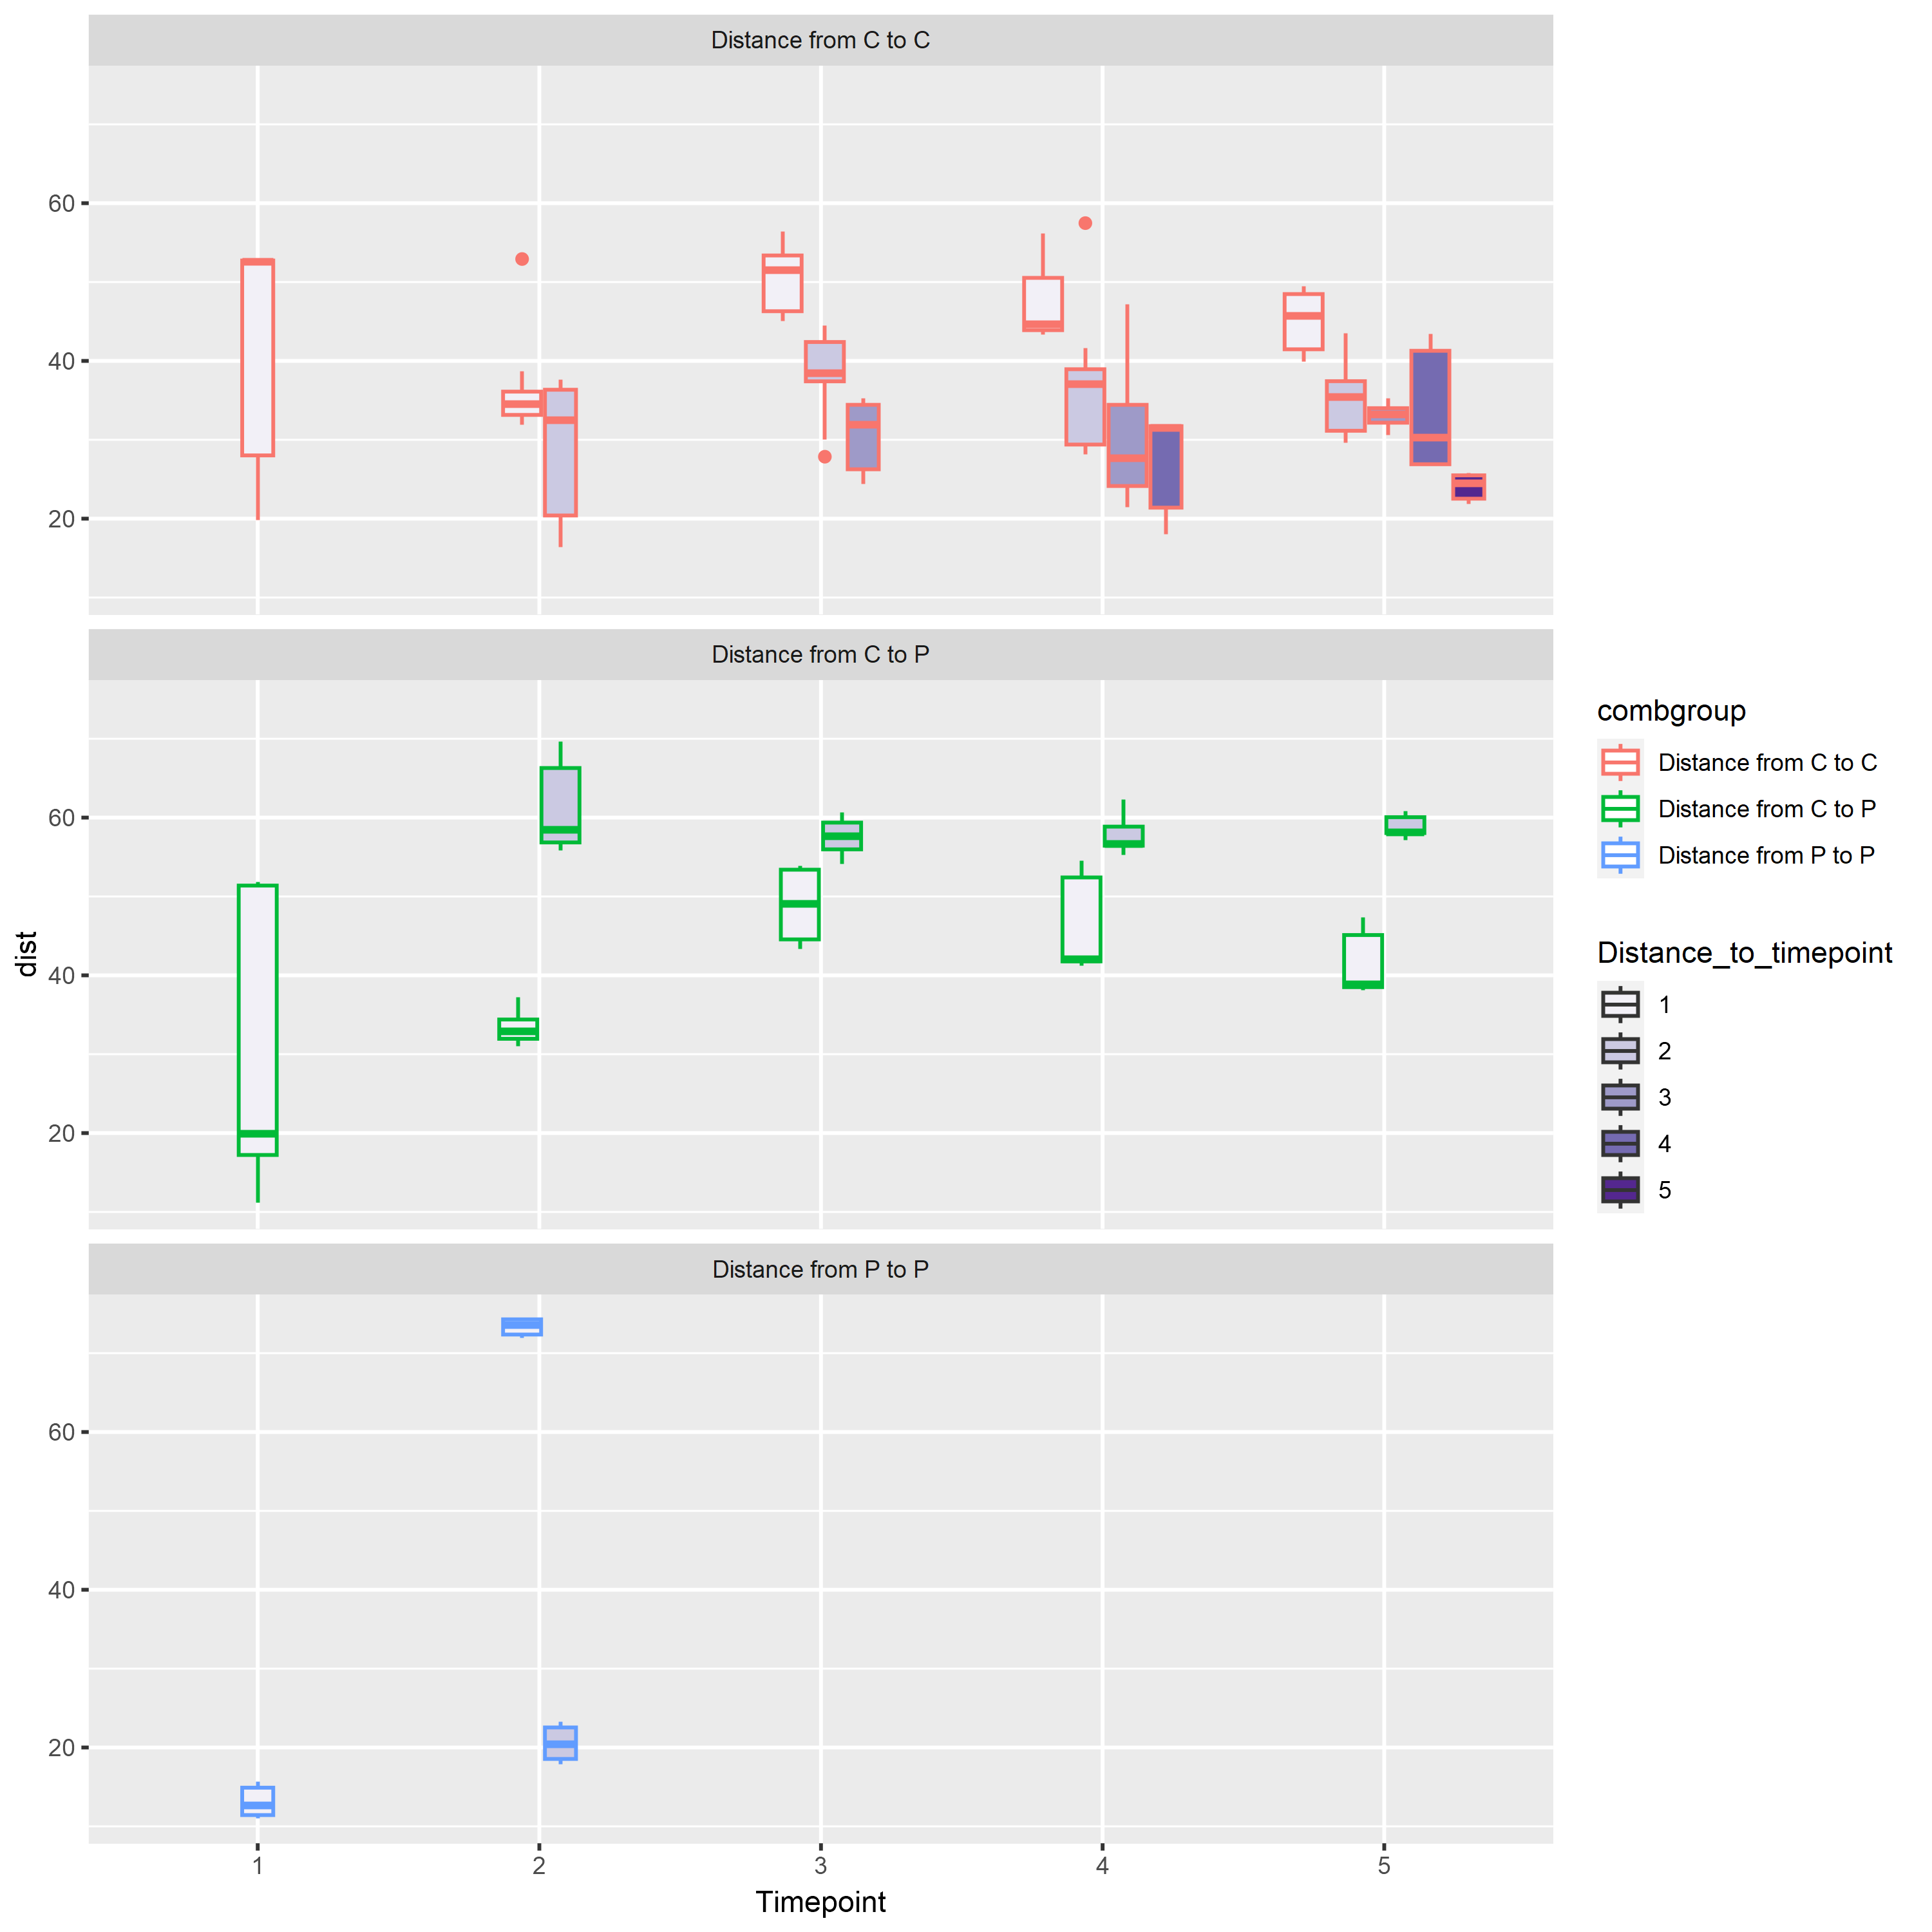

In [113]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=combgroup)) +
   #geom_point() +
   #geom_line(aes(group=Timepoint_2))
   geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1)

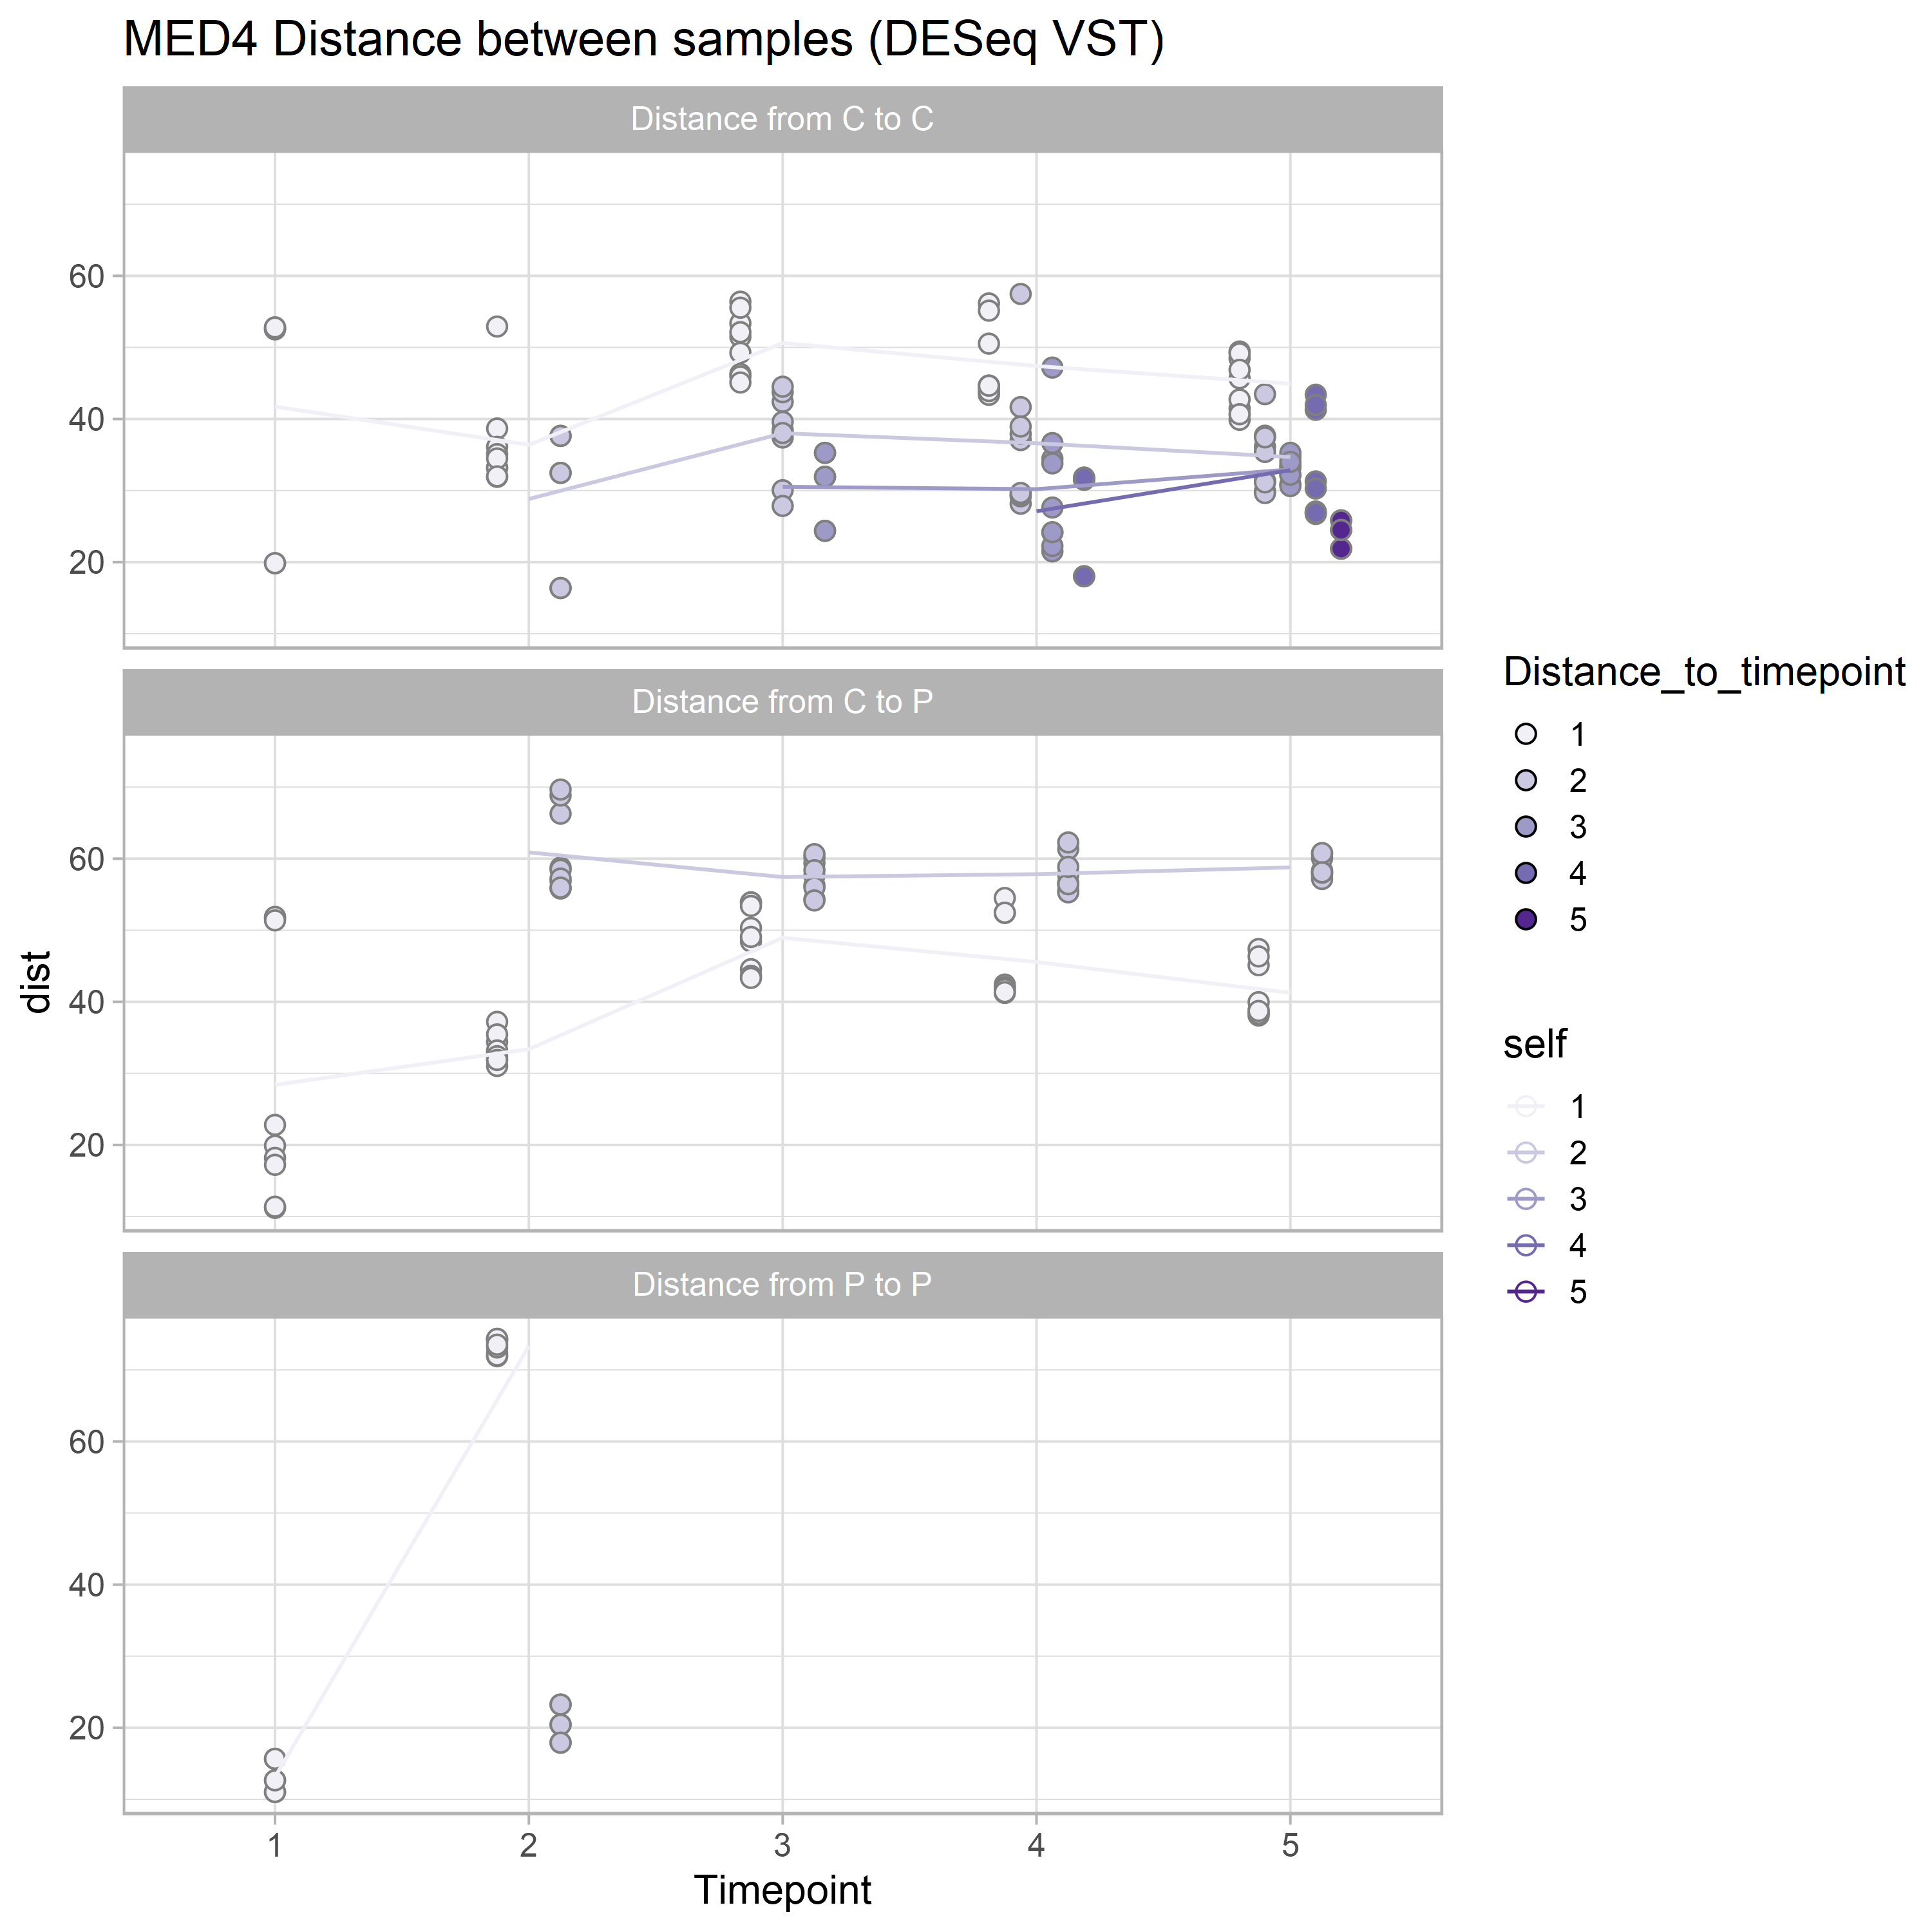

In [114]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=self,
                  group=Distance_to_timepoint)) +
   geom_point(shape = 21, stroke = 0.5,
       position=position_dodge(width=0.5), #color='grey',
             size=3) +
   stat_summary(aes(color=Distance_to_timepoint), fun=mean, geom="line") +
   #geom_line(aes(group=Timepoint_2))
   #geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   scale_color_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1) +
  ggtitle("MED4 Distance between samples (DESeq VST)") +
  theme_light(base_size = 15)


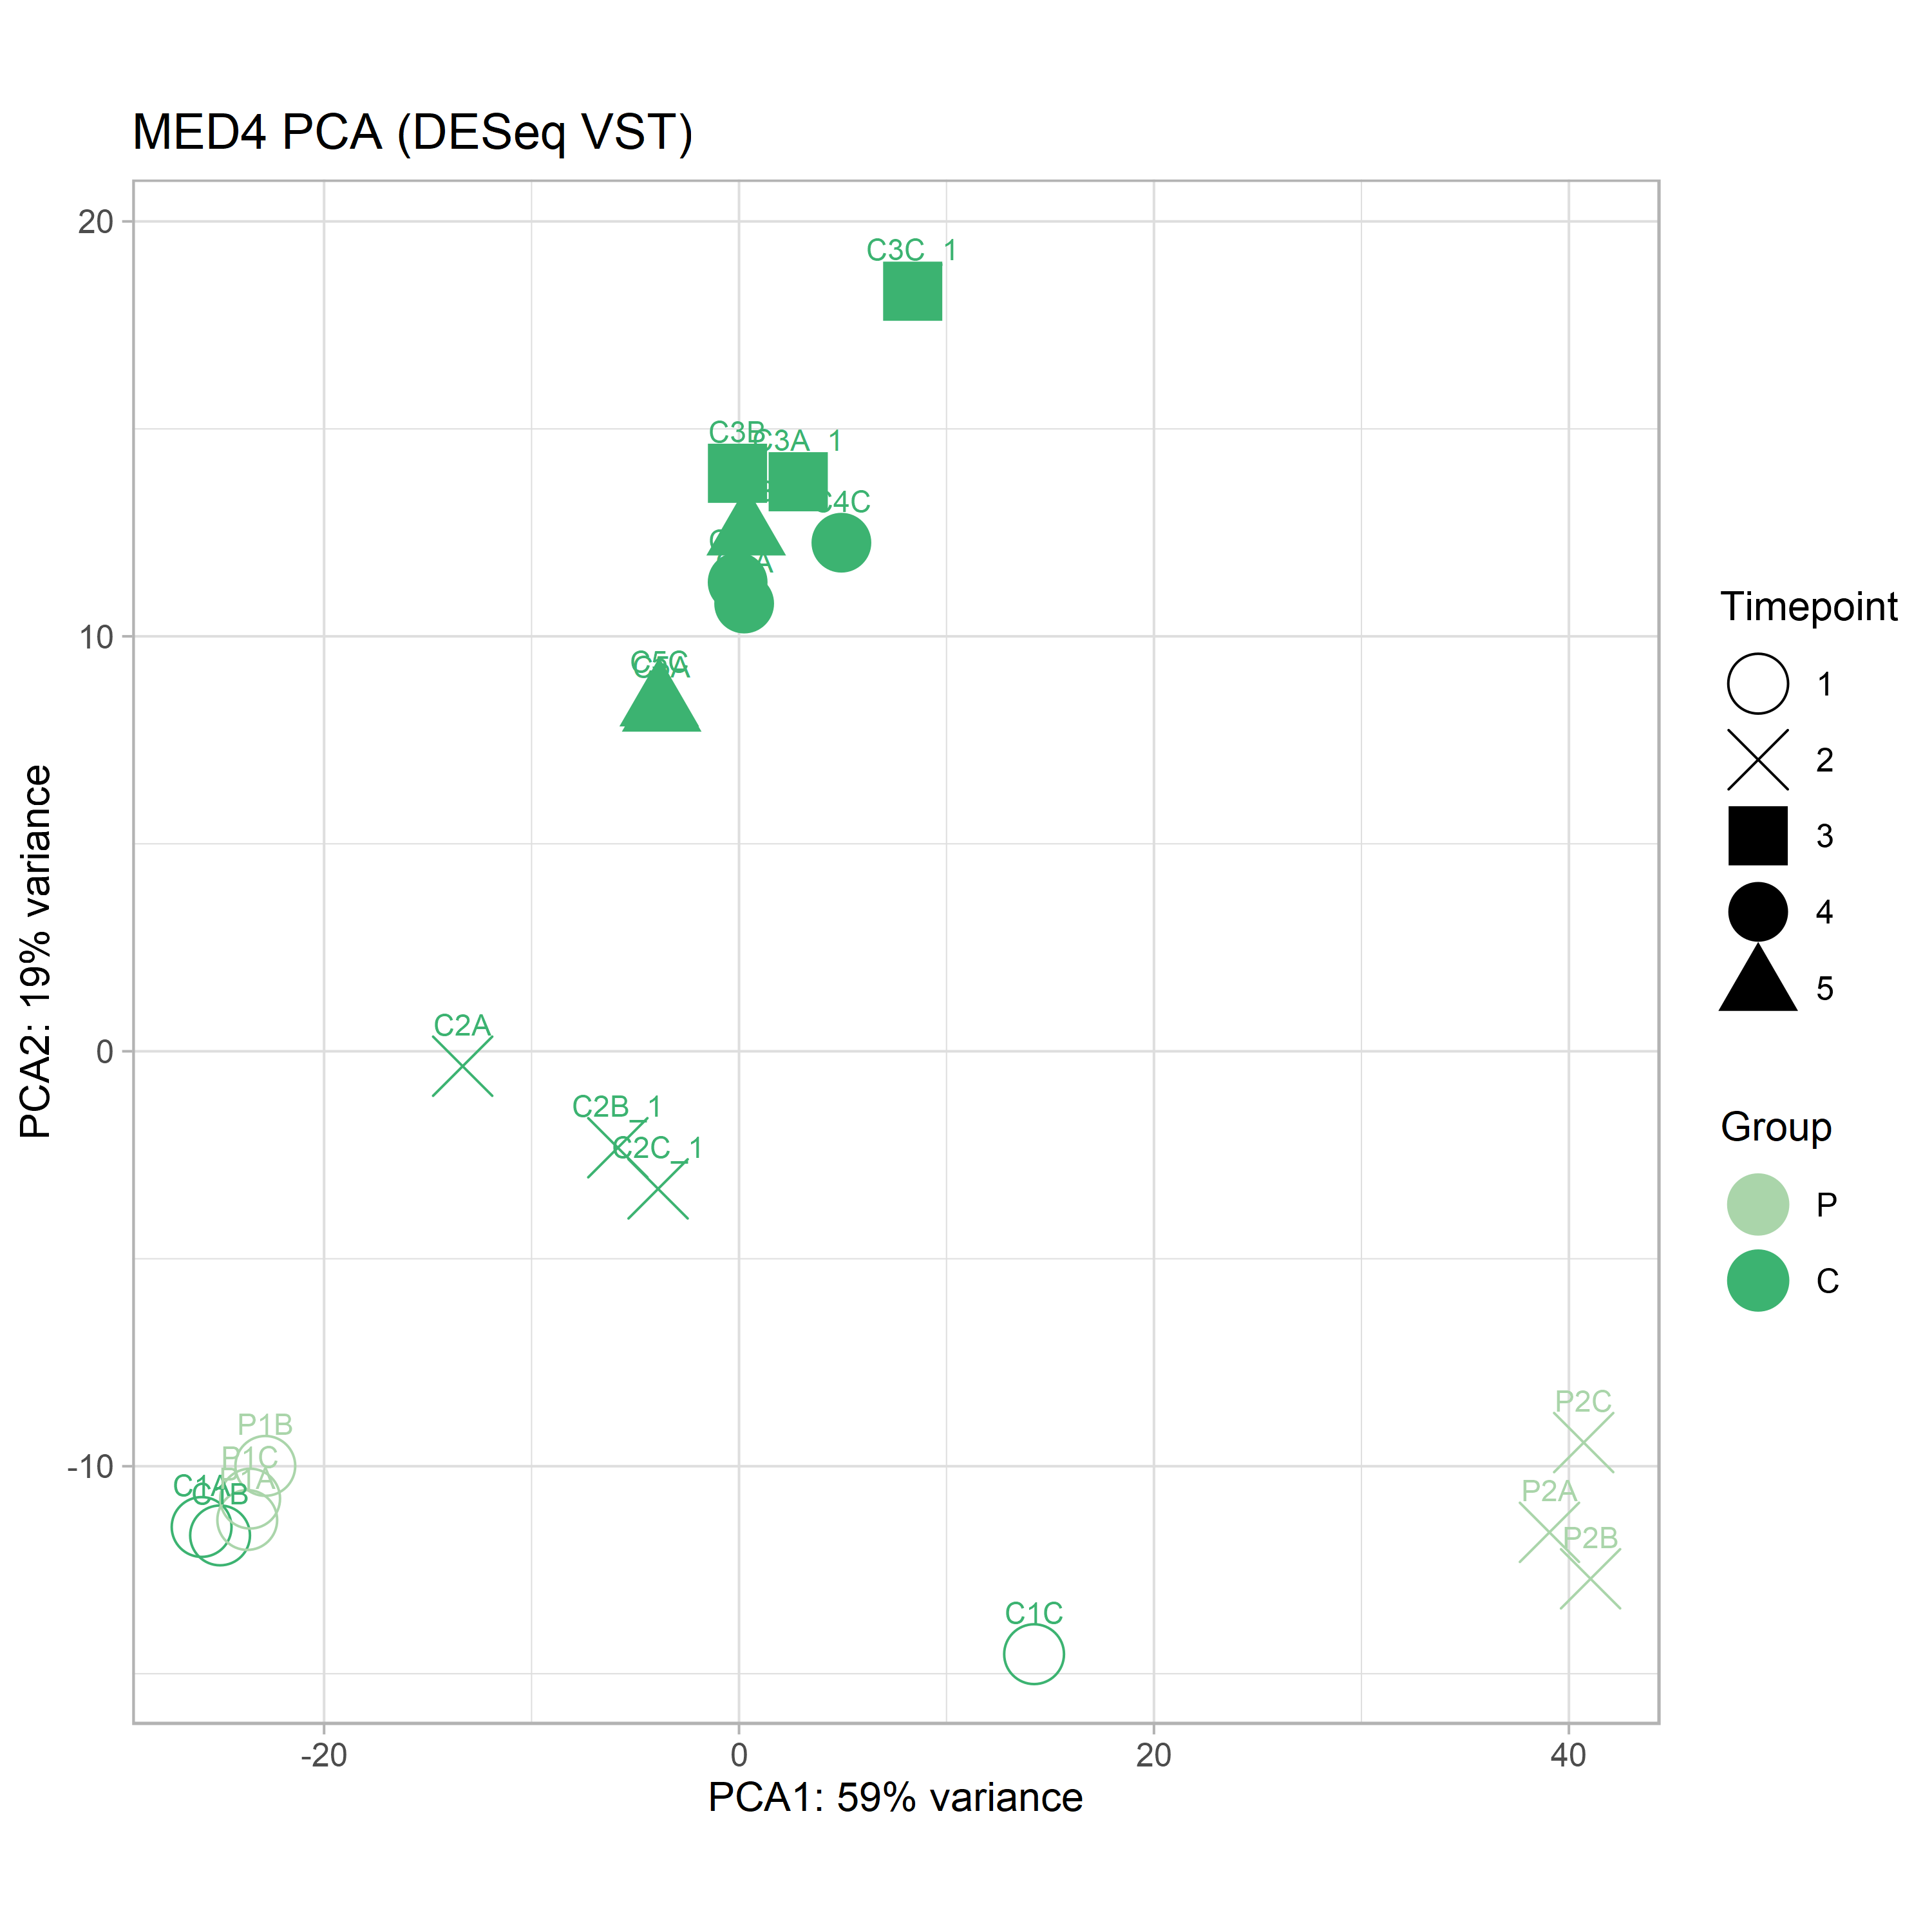

In [115]:
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1, y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =10) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(1, 4, 15, 16, 17))+
  ggtitle("MED4 PCA (DESeq VST)") +
  theme_light(base_size = 15)



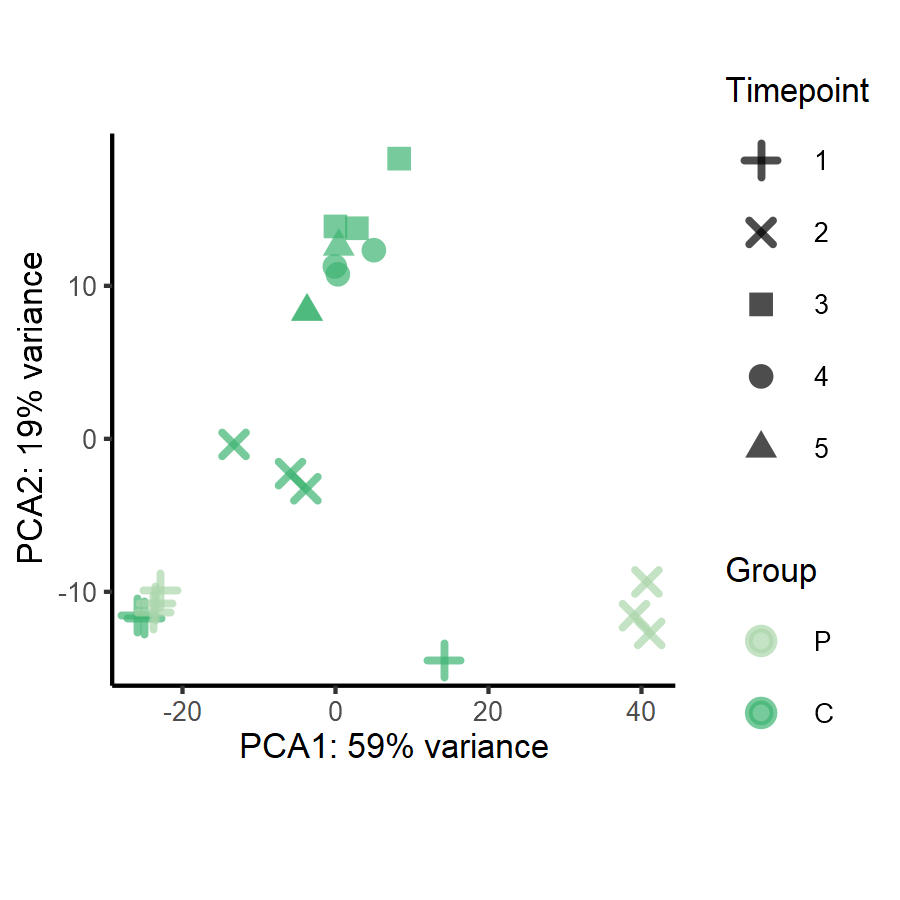

In [116]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample', 'treatment'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1,  y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =2, stroke = 1, alpha=0.7, position=position_jitter(h=0.1,w=0.1)) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  #geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(3,4, 15,16,17))+
  #ggtitle("1A3 PCA (DESeq VST)") +
  theme_classic(base_size = 8)  



In [117]:
assay(vsd)# [,c('C1', 'C2', 'C3', 'C4', 'C5')] #%>% select(starts_with('C')) # %>% rowSds() %>% hist()
#hist(rowSds(assay(vsd)))

,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,C4A,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
TX50_RS00020,10.196298,10.135472,11.551254,10.230150,10.845017,10.966830,10.274913,10.706088,10.923666,10.786769,⋯,10.671712,10.901660,10.826097,10.564112,10.142860,10.130244,9.976754,11.670544,12.074504,12.088422
TX50_RS00025,7.178309,7.382920,8.057168,7.595960,7.008740,7.272287,6.684207,6.525936,6.051336,6.931801,⋯,6.803579,7.099192,6.376845,7.156434,7.395142,6.938349,7.461479,7.077761,7.555580,7.686886
TX50_RS00030,8.590541,8.763096,9.998871,8.890356,8.838601,9.162565,9.711679,9.513262,9.784730,9.753935,⋯,10.290864,9.572384,9.985185,10.007705,8.766277,8.952870,8.760403,11.019518,11.592592,11.774860
TX50_RS00035,8.456453,8.529261,8.308219,8.508072,8.362150,8.563770,8.513766,8.572288,8.179855,8.744493,⋯,8.786924,8.493312,8.507921,8.725710,8.431836,8.767662,8.479597,9.180190,9.904398,10.216944
TX50_RS00040,9.311325,9.537627,10.611074,9.650917,10.010929,9.937065,9.325812,9.153609,9.206187,9.644019,⋯,9.538901,9.510286,9.405422,9.467189,9.350930,9.501430,9.254101,10.597921,10.178420,10.276848
TX50_RS00045,7.025627,6.801311,8.303090,7.835281,7.089330,7.175387,6.161360,7.477582,7.133886,7.515827,⋯,6.596979,7.020172,6.829618,6.919186,6.810775,6.385778,6.837556,8.169503,8.876417,8.498092
TX50_RS00050,7.268530,7.157081,9.016072,8.142942,8.014012,8.275220,8.567281,8.720092,9.023960,8.624571,⋯,8.959702,8.152404,8.122170,8.405075,7.102227,7.011465,7.315544,9.388393,9.584197,9.748453
TX50_RS00055,10.872621,10.266847,11.461205,9.688666,11.110360,11.333485,11.153574,11.448826,11.219804,10.986426,⋯,11.196455,10.887296,10.857256,10.689352,10.151178,10.556254,10.428102,10.894423,10.541908,10.893787
TX50_RS00060,7.492972,7.752974,8.465695,7.610352,7.456200,7.932881,7.893105,6.878197,7.328889,7.535687,⋯,6.481281,7.487566,6.621091,7.612530,7.603730,7.560892,7.548583,7.101086,7.186580,7.112002
TX50_RS00065,8.289605,7.998135,7.480265,7.581422,7.591314,7.381466,8.088853,7.995404,7.653934,8.052183,⋯,8.558487,7.415369,8.073984,7.992088,8.092893,8.188280,7.825035,6.993003,6.819004,7.002426


In [118]:
alpha=0.01

In [119]:
dds <- DESeq(dds)
res <- results(dds, alpha=alpha)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 8 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): treatment longterm vs P1 
Wald test p-value: treatment longterm vs P1 
DataFrame with 1855 rows and 6 columns
              baseMean log2FoldChange     lfcSE      stat      pvalue
             <numeric>      <numeric> <numeric> <numeric>   <numeric>
TX50_RS00020  1911.213      0.6136651  0.258129  2.377355 0.017437277
TX50_RS00025   129.727     -0.6192646  0.268984 -2.302235 0.021321915
TX50_RS00030  1008.790      1.0030375  0.264448  3.792953 0.000148866
TX50_RS00035   436.526      0.0284925  0.194579  0.146432 0.883580552
TX50_RS00040   836.808      0.0477314  0.223657  0.213413 0.831004835
...                ...            ...       ...       ...         ...
TX50_RS09870   34.4138      -0.163260  0.345031 -0.473175   0.6360887
TX50_RS09875   73.9437      -0.455732  0.415058 -1.097997   0.2722060
TX50_RS09880  139.8116      -0.240058  0.349441 -0.686977   0.4920971
TX50_RS09885  219.9974      -0.363977  0.184614 -1.971562   0.0486596
TX50_RS09890  163.0409    

In [120]:
s = summary(res)
s


out of 1855 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 256, 14%
LFC < 0 (down)     : 236, 13%
outliers [1]       : 8, 0.43%
low counts [2]     : 36, 1.9%
(mean count < 10)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



NULL

In [136]:
sum_dds <- function(name) {
    res = results(dds, contrast=name)
    sum = table(as.data.frame(res) %>% mutate(
           contrast = paste0(name[2],'vs', name[3]),
        na_pvalue = is.na(pvalue),
               na_padj = is.na(padj),
               significant = padj < 0.05,
               direction = if_else(log2FoldChange > 0, 'up', 'down'),
               status = if_else(na_pvalue, 'outlier',
                                if_else(na_padj, 'lowcount', 
                                        if_else(significant, direction, 'no_significant'
                                        
                               )))
               ) %>% select(status))
    #sum = cbind(sum, name=name)
    return(sum)
    }


In [137]:
get_dds <- function(name) {
    res = results(dds, contrast=name)
    res = as.data.frame(res) %>% 
       mutate(
           contrast = paste0(name[2],'vs', name[3]),
           na_pvalue = is.na(pvalue),
           na_padj = is.na(padj),
           significant = padj < 0.05,
           direction = if_else(log2FoldChange > 0, 'up', 'down'),
           status = if_else(na_pvalue, 'outlier',
                            if_else(na_padj, 'lowcount', 
                                    if_else(significant, direction, 'no_significant'
                                           )))
       ) 
    return(res)
}


In [138]:
results_names = resultsNames(dds)

dds$treatment = factor(dds$treatment, levels=c('P1', 'C1', 'C2', 'longterm', 'NA'))

contrasts_to_check = list (
    c('treatment','longterm','P1'), 
    c('treatment','longterm','P2'), 
    c('treatment','longterm','C1'), 
    c('treatment','longterm','C2')
)

contrasts_to_check

[[1]]
[1] "treatment" "longterm"  "P1"       

[[2]]
[1] "treatment" "longterm"  "P2"       

[[3]]
[1] "treatment" "longterm"  "C1"       

[[4]]
[1] "treatment" "longterm"  "C2"

In [139]:
#bind_rows(
sum_df = lapply(contrasts_to_check, sum_dds) %>% bind_rows 
sum_df$name= contrasts_to_check
sum_df


down,no_significant,outlier,up,name
<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<list>
359,1124,8,364,treatmen....
441,856,8,550,treatmen....
333,1275,8,239,treatmen....
115,1590,8,142,treatmen....


In [140]:
#bind_rows(
res_df = lapply(contrasts_to_check, get_dds) %>% 
  bind_rows %>%
  rownames_to_column(var = 'gene_id') 

write_csv(res_df, file.path('DE_results','MED4_DE_DESEQ_longterm_results.csv'))


In [141]:
sum_df = sum_df %>% 
   filter(name != 'Intercept') %>% 
   mutate(tot_fc = up + down, 
         name = str_remove(name, 'treatment_'))

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `name = str_remove(name, "treatment_")`.
Caused by warning in `stri_replace_first_regex()`:
! argument is not an atomic vector; coercing"


In [142]:
sum_df

down,no_significant,outlier,up,name,tot_fc
<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<chr>,<table[1d]>
359,1124,8,364,"c(""treatment"", ""longterm"", ""P1"")",723
441,856,8,550,"c(""treatment"", ""longterm"", ""P2"")",991
333,1275,8,239,"c(""treatment"", ""longterm"", ""C1"")",572
115,1590,8,142,"c(""treatment"", ""longterm"", ""C2"")",257


In [143]:
dds@design

~treatment

In [144]:
res_df

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,na_pvalue,na_padj,significant,direction,status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
TX50_RS00020...1,1911.21342,0.613665065,0.2581293,2.37735543,1.743728e-02,4.548962e-02,longtermvsP1,FALSE,FALSE,TRUE,up,up
TX50_RS00025...2,129.72678,-0.619264628,0.2689841,-2.30223514,2.132192e-02,5.363418e-02,longtermvsP1,FALSE,FALSE,FALSE,down,no_significant
TX50_RS00030...3,1008.79020,1.003037476,0.2644476,3.79295346,1.488661e-04,9.165187e-04,longtermvsP1,FALSE,FALSE,TRUE,up,up
TX50_RS00035...4,436.52573,0.028492544,0.1945790,0.14643177,8.835806e-01,9.175385e-01,longtermvsP1,FALSE,FALSE,FALSE,up,no_significant
TX50_RS00040...5,836.80795,0.047731420,0.2236575,0.21341301,8.310048e-01,8.851591e-01,longtermvsP1,FALSE,FALSE,FALSE,up,no_significant
TX50_RS00045...6,162.04778,0.404794306,0.3337466,1.21287922,2.251760e-01,3.343248e-01,longtermvsP1,FALSE,FALSE,FALSE,up,no_significant
TX50_RS00050...7,364.42876,1.565969669,0.3167796,4.94340494,7.676979e-07,9.711905e-06,longtermvsP1,FALSE,FALSE,TRUE,up,up
TX50_RS00055...8,1881.38155,0.655969474,0.2835447,2.31346093,2.069731e-02,5.243302e-02,longtermvsP1,FALSE,FALSE,FALSE,up,no_significant
TX50_RS00060...9,163.35588,-0.381112222,0.3029981,-1.25780419,2.084626e-01,3.171585e-01,longtermvsP1,FALSE,FALSE,FALSE,down,no_significant
